# <center>Learning how to play Space Invaders with RL.</center>

![space invaders poster image](https://cdn-images-1.medium.com/max/1200/1*Ya6drllhmC82yh0J-elrPA.jpeg)

In [12]:
import gym
import numpy as np
from utils.frameStack import FrameStack, LazyFrames

env = gym.make('SpaceInvaders-v0')
env_alt = FrameStack(env, 4)

**Observation space**: the observation space consists on 3 sequential images of size 210x160

**Action space**: there are 6 possible actions: *left, right, shoot, left-shoot, right-shoot, do nothing*.

In [13]:
print(env.observation_space.shape)
print(env.action_space)

(210, 160, 3)
Discrete(6)


In [14]:
# Example of how env works
total_reward = 0
env.reset()
while True:
    env.render()
    next_state, reward, done, info = env.step((env.action_space.sample())) # select random action
    total_reward += reward
    if done:
        print(total_reward)
        break
        
env.close()

105.0


## Training

In [7]:
from dqn.dqnAgent import DQNAgent
from dqn.model import Model


agent = DQNAgent(env)
episodes = 1000
rewards = []

for e in range(1, episodes):
    # reset state at the beggining of each game
    state = env.reset()    
    state = Model.img_preprocessing(state)
    
    total_reward = 0
    
    while(True):
        # env.render()
        
        action = agent.act(state)
        next_state, reward, done, info = env.step(action)
        next_state = Model.img_preprocessing(next_state)
        
        agent.memory.add(state, action, reward, next_state, done)
        
        state = next_state
        
        total_reward += reward
        
        if done:
            print("episode: {}, score: {}".format(e, total_reward))
            rewards.append(total_reward)
            break
      
    env.close()
    # train the agent with the experience of the episode
    agent.learn(32)
    

Using TensorFlow backend.


Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
episode: 1, score: 205.0
Instructions for updating:
Use tf.cast instead.


KeyboardInterrupt: 

(4, 210, 160, 3) 0.0


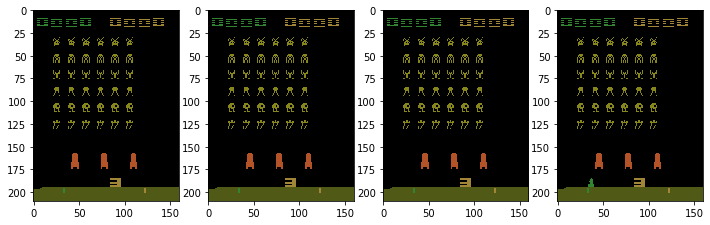

In [25]:
import skimage
from skimage.color import rgb2gray
from skimage.util import crop
import matplotlib.pyplot as plt
from PIL import Image

env_alt.reset()
next_state, reward, done, info = env_alt.step((env.action_space.sample())) # select random action
"""
x_t = Image.fromarray(next_state)
area = (0, 20, 160 , 196)
x_t = np.asarray(x_t.crop(area))
x_t = skimage.color.rgb2gray(x_t)
x_t = skimage.transform.resize(x_t,(80,80))
x_t = skimage.exposure.rescale_intensity(x_t, out_range=(0, 255))
x_t = x_t/255.

s_t = np.stack((x_t, x_t, x_t, x_t), axis=2)
s_t = s_t.reshape(1, s_t.shape[0], s_t.shape[1], s_t.shape[2])
"""
print(np.asarray(next_state._frames).shape, reward)

fig, axes = plt.subplots(1, 4, figsize=(12, 4))
ax = axes.ravel()

ax[0].imshow(np.asarray(next_state._frames[0]))
ax[1].imshow(np.asarray(next_state._frames[1]))
ax[2].imshow(np.asarray(next_state._frames[2]))
ax[3].imshow(np.asarray(next_state._frames[3]))